In [3]:
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import numpy as np
%matplotlib inline

In [4]:
#read and analyze boston dataset
from sklearn.datasets import load_boston
dataset = load_boston()

print(dataset.keys()) #it's a dictionary, let's see the keys
print('\n')
print(dataset.data.shape) #506 istances with 13 columns
print('\n')
print(dataset.feature_names) #name of the features
print('\n')
print(dataset.DESCR) #description of the dataset

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


(506, 13)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to fi

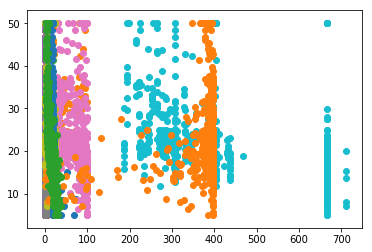

In [30]:
#define the predictors as the pre-set feature names
x = pd.DataFrame(data=dataset['data'], columns= dataset['feature_names'])

#Put housing value -- MEDV as our target
y=pd.DataFrame(data=dataset['target'])

#plot the variables
for index, feature_name in enumerate(dataset.feature_names):
    plt.scatter(x[feature_name], y, label=feature_name)

In [6]:
from sklearn.model_selection import train_test_split
 
#Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print(X_train.shape)
print("\n")
print(X_test.shape) #25% of 506 == 126.5
print("\n")
print(X_train.head())
print("\n")
print(y_train.head())

(379, 13)


(127, 13)


        CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD    TAX  \
182  0.09103   0.0   2.46   0.0  0.4880  7.155  92.2  2.7006  3.0  193.0   
155  3.53501   0.0  19.58   1.0  0.8710  6.152  82.6  1.7455  5.0  403.0   
280  0.03578  20.0   3.33   0.0  0.4429  7.820  64.5  4.6947  5.0  216.0   
126  0.38735   0.0  25.65   0.0  0.5810  5.613  95.6  1.7572  2.0  188.0   
329  0.06724   0.0   3.24   0.0  0.4600  6.333  17.2  5.2146  4.0  430.0   

     PTRATIO       B  LSTAT  
182     17.8  394.12   4.82  
155     14.7   88.01  15.02  
280     14.9  387.31   3.76  
126     19.1  359.29  27.26  
329     16.9  375.21   7.34  


        0
182  37.9
155  15.6
280  45.4
126  15.7
329  22.6


In [7]:
#Training the algorithm use LinearRegression()
from sklearn.linear_model import LinearRegression

#Fitting the model
reg = LinearRegression().fit(X_train, y_train)

#Prediction
prediction = reg.predict(X_test)

#Calculate MSE, R2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#MSE
print("MSE: " + str(mean_squared_error(y_test, prediction)))
print("\n")

#R^2
print("R^2: " + str(r2_score(y_test, prediction)))
print("R^2 (variance weighted): " + str(r2_score(y_test, prediction, multioutput='variance_weighted')))
print("\n")

#use your_model.coef_
print("SCORE: " + str(reg.score(X_train, y_train)))
print("\n")
print("INTERCEPT: " + str(reg.intercept_))
print("\n") 
print("COEF: " + str(reg.coef_))

MSE: 22.098694827098036


R^2: 0.6844267283527123
R^2 (variance weighted): 0.6844267283527123


SCORE: 0.7480872598623441


INTERCEPT: [29.83642016]


COEF: [[-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
  -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
   2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
  -5.17639519e-01]]


In [8]:
from sklearn.linear_model import Ridge

#Linear Model with Ridge
clf = Ridge(alpha=.5)

#Model fitting
clf.fit(X_train, y_train)

#Prediction
prediction = clf.predict(X_test)

#MSE
print("MSE: " + str(mean_squared_error(y_test, prediction)))
print("\n")

#R^2
print("R^2: " + str(r2_score(y_test, prediction)))
print("R^2 (variance weighted): " + str(r2_score(y_test, prediction, multioutput='variance_weighted')))

MSE: 22.312902839780204


R^2: 0.6813678000357204
R^2 (variance weighted): 0.6813678000357204


In [9]:
from sklearn.linear_model import Lasso

#Linear Model with Lasso
lasso = Lasso(alpha=.5)

#Model fitting
lasso.fit(X_train, y_train)

#Prediction
prediction = lasso.predict(X_test)

#MSE
print("MSE: " + str(mean_squared_error(y_test, prediction)))
print("\n")

#R^2
print("R^2: " + str(r2_score(y_test, prediction)))
print("R^2 (variance weighted): " + str(r2_score(y_test, prediction, multioutput='variance_weighted')))

MSE: 23.230317000049006


R^2: 0.6682669635258389
R^2 (variance weighted): 0.6682669635258389


In [40]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

ridge_score = list()
lasso_score = list()
ridge_coef = list()
lasso_coef = list()
alphas = [0.0001, 0.01, 0.1, 0.5, 0.7, 1, 10, 40, 100]

for alpha in alphas:
    print(alpha)
    
    ridge_regression = Ridge(alpha=alpha)
    ridge_regression.fit(X_train, y_train)
    ridge_score.append(cross_val_score(ridge_regression, x, y, cv=3).mean())
    ridge_coef.append(ridge_regression.coef_)
    
    lasso_regression = Lasso(alpha=alpha)
    lasso_regression.fit(X_train, y_train)
    lasso_score.append(cross_val_score(lasso_regression, x, y, cv=3).mean())
    lasso_coef.append(lasso_regression.coef_)

0.0001
0.01
0.1
0.5
0.7
1
10
40
100


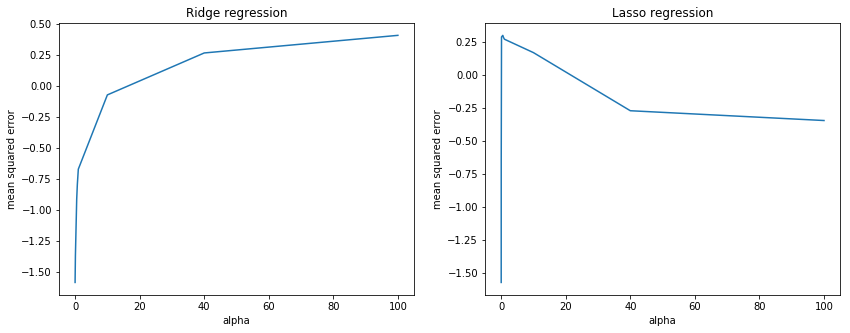

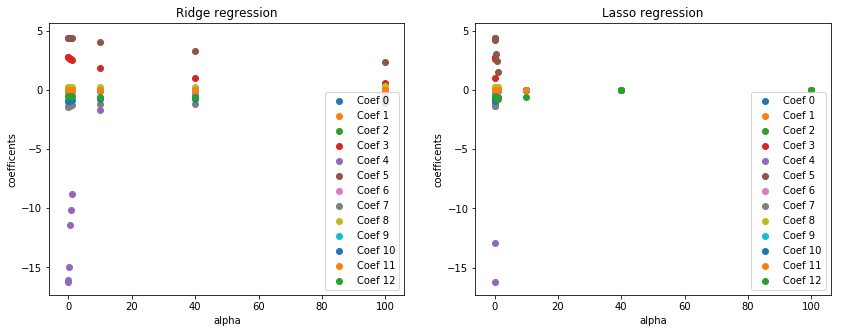

In [51]:
plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 2, 1)
plt.xlabel("alpha")
plt.ylabel("mean squared error")
plt.plot(alphas,ridge_score)
plt.title("Ridge regression")

ax = plt.subplot(1, 2, 2)
plt.xlabel("alpha")
plt.ylabel("mean squared error")
plt.plot(alphas,lasso_score)
plt.title("Lasso regression")

plt.show()

ridge_coef = np.array(ridge_coef)
lasso_coef = np.array(lasso_coef)

plt.figure(figsize=(14, 5))

axR = plt.subplot(1, 2, 1)
axR.set_xlabel("alpha")
axR.set_ylabel("coefficents")
axR.set_title("Ridge regression")
for i in range(len(dataset.feature_names)):
    axR.scatter(alphas,ridge_coef[:,0,i],label="Coef "+str(i))
axR.legend(loc='best')
    
axL = plt.subplot(1, 2, 2)
axL.set_xlabel("alpha")
axL.set_ylabel("coefficents")
axL.set_title("Lasso regression")
for i in range(len(dataset.feature_names)):
    axL.scatter(alphas,lasso_coef[:,i],label="Coef "+str(i))
axL.legend(loc='best')
    
plt.show()

In [36]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import make_scorer

ridgecv = RidgeCV(alphas=alphas, scoring=make_scorer(mean_squared_error), normalize=True)
ridgecv.fit(X_train, y_train)
print(ridgecv.alpha_)

100.0
